Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **44 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Enjui Chang"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Randomized quicksort

## Part A. Median-of-3 partitioning quicksort 

## Question 1 [time estimate: 10 minutes]

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [2]:
import timeit
import random

#intialize variables and the three locations for partitioning
eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]

def median(x1, x2, x3):
    """
    Input: Three values (int or float)
    
    Output: Median number of the three values
    """
    if (x1 < x2 < x3) or (x3 < x2 < x1): #return if x2 is the median
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):  #return if x3 is the median
        return x3
    else:
        return x1 #return if x1 is the median
    
def qsort(lst):
    """
    the main qsort function
    ---
    Input: An unsorted list (int or floats)
    
    Output: sorted list
    """
    indices = [(0, len(lst))] #intialize the stored indices

    while indices: #run when indices is not empty
        (frm, to) = indices.pop() #find the length of the subproblem
        
        if frm == to: #if the two values are equal, exit the loop
            continue

        # Find the partition:
        N = to - frm #find the length of the sublist
        
        #find the index of the initial, center, and last element
        inds = [frm + int(N * n) for n in locations] 
        
        #find the values of the initial, center, and last element
        values = [lst[ind] for ind in inds]
        
        #find the parition by choosing the median of the three
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] #lower than partition
        upper = [a for a in lst[frm:to] if a > partition] #higher than partition
        counts = sum([1 for a in lst[frm:to] if a == partition]) #number equal to partition
        
        #find the length of the sublists
        ind1 = frm + len(lower)
        ind2 = ind1 + counts
        
        # Push back into correct place:
        lst[frm:ind1] = lower #the first half is the lower sublist
        lst[ind1:ind2] = [partition] * counts #the middle is value same as the partition
        lst[ind2:to] = upper #the last half is the upper sublist

        # Enqueue other locations
        indices.append((frm, ind1)) #push the indices of the lower sublist
        indices.append((ind2, to)) #push the indices of the upper sublist
    return lst

def randomized_quicksort():
    """
    Randomly generated an unsorted list, outputs the sorted list
    ---
    Input: None
    
    Output: A sorted list
    """
    lst = [i for i in range(N)] #create a list of consecutive integers
    random.shuffle(lst) #sufffle the list so it's a random list
    return qsort(lst)

def test_quicksort():
    """
    Test if the algorithm works for any combinations of list with length N
    ---
    Input: Three values (int or float)
    
    Output: Median number of the three
    """
    lst = randomized_quicksort() #take the unsorted from randomized_quicksort
    assert (lst == [i for i in range(N)]) #see if it is sorted


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.05789151900000178


## Question 2 [time estimate: 3 minutes]

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

In `randomized_quicksort`, we are using an iterative method to build the algorithm, but in $RANDOMIZED-QUICKSORT$ we are taking a recursive approach to the problem.

## Question 3 [time estimate: 10 minutes]

What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

In [3]:
import matplotlib.pyplot as plt

#intialize storage
runtime_lst_q3 = []
runtime_dummy = []


#number of iterations for averaging the runtime
iteration = 20

#iterate through different sizes of list
for k in range(1,101,10):
    N = k*100
    #average the runtime for each list
    for i in range(iteration):
        runtime = timeit.timeit(randomized_quicksort, number=1)
        runtime_dummy.append(runtime)
    
    #average the runtime for each length
    runtime_lst_q3.append(sum(runtime_dummy)/iteration)

#plot the graph
k = [i for i in range(1, 101, 10)]
plt.plot(k,runtime_lst_q3, label = "Q3")
plt.xlabel("Length of list (hundreds)")
plt.ylabel("Runtime (s)")
plt.title("Runtime of Randomized Quicksort Algorithm for Different Length Sizes")
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

## Question 4.

### Question 4a [time estimate: 7 minutes]

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [4]:
def qsort(lst):
    """
Input: An unsorted list (int or floats)

Output: sorted list
"""
indices = [(0, len(lst))] #intialize the stored indices

while indices: #run when indices is not empty
    (frm, to) = indices.pop() #find the length of the subproblem

    if frm == to: #if the two values are equal, exit the loop
        continue

    # Find the partition:
    N = to - frm #find the length of the sublist

    #find the index of the initial, center, and last element
    inds = [frm + int(N * n) for n in locations] 

    #find the values of the initial, center, and last element
    values = [lst[ind] for ind in inds]

    #find the parition by choosing the median of the three
    partition = median(*values)

    # Split into lists:
    lower = [a for a in lst[frm:to] if a < partition] #lower than partition
    upper = [a for a in lst[frm:to] if a >= partition] #higher than partition
    counts = sum([1 for a in lst[frm:to] if a == partition]) #number equal to partition

    #find the length of the sublists
    ind1 = frm + len(lower)
    ind2 = ind1 + 1

    # Push back into correct place:
    lst[frm:ind1] = lower #the first half is the lower sublist
    lst[ind1] = partition #push the partition in the center of the list 
    upper.remove(partition) #remove the alreadly counted partition
    lst[ind2:to] = upper #the last half is the upper sublist

    # Enqueue other locations
    indices.append((frm, ind1)) #push the indices of the lower sublist
    indices.append((ind2, to)) #push the indices of the upper sublist
return lst

NameError: name 'lst' is not defined

In [ ]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 4b [time estimate: 3 minutes]

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

In [ ]:
import matplotlib.pyplot as plt

#intialize storage
runtime_lst_q4 = []
runtime_dummy = []


#number of iterations for averaging the runtime
iteration = 20

#iterate through different sizes of list
for k in range(1,101,10):
    N = k*100
    #average the runtime for each list
    for i in range(iteration):
        runtime = timeit.timeit(randomized_quicksort, number=1)
        runtime_dummy.append(runtime)
    
    #average the runtime for each length
    runtime_lst_q4.append(sum(runtime_dummy)/iteration)
    
#plot the graph
k = [i for i in range(1, 101, 10)]
plt.plot(k,runtime_lst_q3, label = "Q3")
plt.plot(k,runtime_lst_q4, label = "Q4")
plt.xlabel("Length of list (hundreds)")
plt.ylabel("Runtime (s)")
plt.title("Runtime of Randomized Quicksort Algorithm for Different Length Sizes")
plt.legend()
plt.show()

## Question 5.

### Question 5a [time estimate: 3 minutes]

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [7]:
def qsort(lst):
    """
    the main qsort function
    ---
    Input: An unsorted list (int or floats)
    
    Output: sorted list
    """
    indices = [(0, len(lst))] #intialize the stored indices

    while indices:#run when indices is not empty
        (frm, to) = indices.pop() #find the length of the subproblem
        
        if frm == to: #if the two values are equal, exit the loop
            continue

        # Find the partition:
        N = to - frm #find the length of the list
        partition = lst[frm] #assign the first element as the partition

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] #lower than partition
        upper = [a for a in lst[frm:to] if a > partition] #higher than partition
        counts = sum([1 for a in lst[frm:to] if a == partition]) #number equal to partition
        
        #find the length of the sublists
        ind1 = frm + len(lower)
        ind2 = ind1 + counts
        
        # Push back into correct place:
        lst[frm:ind1] = lower #the first half is the lower sublist
        lst[ind1:ind2] = [partition] * counts #the middle is value same as the partition
        lst[ind2:to] = upper #the last half is the upper sublist

        # Enqueue other locations
        indices.append((frm, ind1)) #push the indices of the lower sublist
        indices.append((ind2, to)) #push the indices of the upper sublist
    return lst

In [8]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b [time estimate: 3 minutes]

Does this change the running time of your algorithm? Justify your response with a graph. 



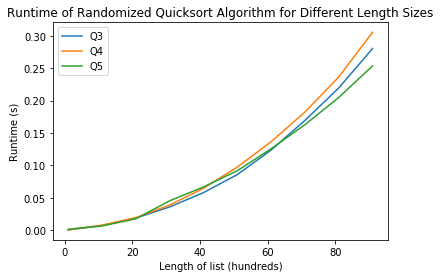

In [9]:
import matplotlib.pyplot as plt

#intialize storage
runtime_lst_q5 = []
runtime_dummy = []


#number of iterations for averaging the runtime
iteration = 20

#iterate through different sizes of list
for k in range(1,101,10):
    N = k*100
    #average the runtime for each list
    for i in range(iteration):
        runtime = timeit.timeit(randomized_quicksort, number=1)
        runtime_dummy.append(runtime)
    
    #average the runtime for each length
    runtime_lst_q5.append(sum(runtime_dummy)/iteration)

#plot the graph
k = [i for i in range(1, 101, 10)]
plt.plot(k,runtime_lst_q3, label = "Q3")
plt.plot(k,runtime_lst_q4, label = "Q4")
plt.plot(k,runtime_lst_q5, label = "Q5")
plt.xlabel("Length of list (hundreds)")
plt.ylabel("Runtime (s)")
plt.title("Runtime of Randomized Quicksort Algorithm for Different Length Sizes")
plt.legend()
plt.show()


We see the three quicksort algorithms have the same time complexity as they grow asymptotically of $O(n \lg n)$ and their running time does not change significantly. Specifically, by only choosing the first element as the partition, we are more likely to get unluckly when partitioning, but at the same time, remove the time needed to find the partition, therefore, balancing out the running time.

## Part B. Recursive quicksort [time estimate: 5 minutes]

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


Since each quicksort algorithm calls two quicksort algorithms, the number of recursion calls is proportional to $2^k$, with $k$ being the total partitions made in algorithm. In the best case, the algorithm would partition the array as a balanced binary tree. This means that the total recursions is $\sum_{k=1}^{n}2^k$, which can be solved below:

In [10]:
n = 0
k = 0
while n < 500: #find the maximum recursion and k
    k+=1
    n_1 = n
    n = n_1 + 2**k
print(k,n_1)

8 254


The maximum number of recursion is 254 times. This means that the algorithm can handle $2^8=256$ items. However, in an extremely unbalanced case (when one sublist is always 0), we would have $2\times n$ recursions, meaning that the maximum elements in the list would be 250.